Approximate first derivative at z0 = 1 is: (2.716493623719842+0.08536925132408654j)


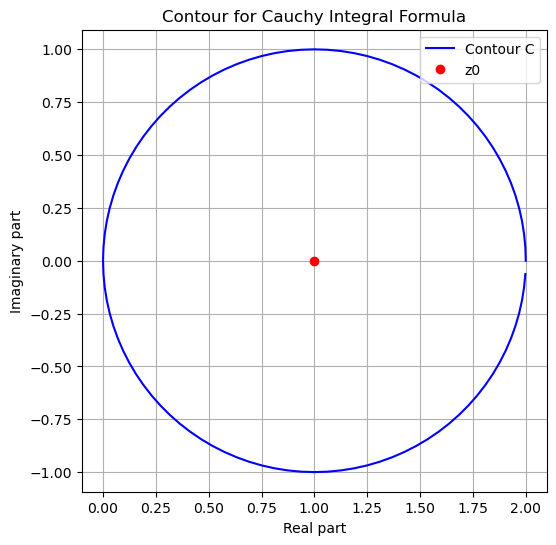

In [1]:
######################################################################################
'''Copyright (c) 2023, 2024 , Prof. Radhamadhab Dalai, ITER , Siksha O Aanusandhan University, 
Odisha, India
Author's email address :  radhamadhabdalai@soa.ac.in'''
###################################################################################

import numpy as np
import matplotlib.pyplot as plt

# Define the function f(z)
def f(z):
    return np.exp(z)

# Parameters
z0 = 1  # Point at which we want the derivative
r = 1   # Radius of the contour
N = 100  # Number of discretization points

# Discretize the contour
theta = np.linspace(0, 2*np.pi, N, endpoint=False)
z = z0 + r * np.exp(1j * theta)

# Compute the integral using the trapezoidal rule
integral = 0
for k in range(N):
    dz = z[(k+1) % N] - z[k]
    integral += f(z[k]) / (z[k] - z0)**2 * dz

# Cauchy Integral Formula for the first derivative
f_prime = integral / (2j * np.pi)

print("Approximate first derivative at z0 =", z0, "is:", f_prime)

# Plot the contour and points
plt.figure(figsize=(6, 6))
plt.plot(np.real(z), np.imag(z), 'b-', label='Contour C')
plt.plot(np.real(z0), np.imag(z0), 'ro', label='z0')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('Contour for Cauchy Integral Formula')
plt.legend()
plt.grid()
plt.axis('equal')


plt.show()

Approximate first derivative at z0 = 1 is: (2.7182818284590238+1.635203896141655e-17j)


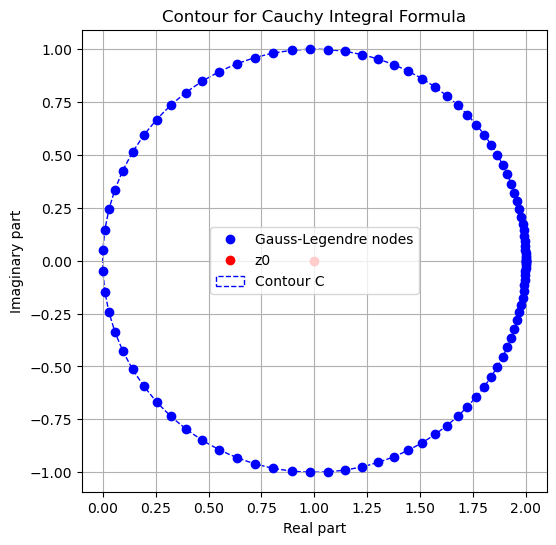

In [2]:
####To find the derivative of a function using Milovanović's approach 
#and the Cauchy Integral Formula with Gauss-Legendre quadrature
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss

# Define the function f(z)
def f(z):
    return np.exp(z)

# Parameters
z0 = 1  # Point at which we want the derivative
r = 1   # Radius of the contour
N = 100  # Number of quadrature points

# Get Gauss-Legendre nodes and weights
nodes, weights = leggauss(N)

# Transform nodes and weights to the complex contour
theta = np.pi * (nodes + 1)  # Mapping from [-1, 1] to [0, 2π]
z = z0 + r * np.exp(1j * theta)  # Contour points
dz = 1j * r * np.exp(1j * theta)  # Derivative dz/dθ
weights = weights * np.pi  # Adjust weights for the interval length

# Compute the integral using Gauss-Legendre quadrature
integral = 0
for k in range(N):
    integral += f(z[k]) / (z[k] - z0)**2 * dz[k] * weights[k]

# Cauchy Integral Formula for the first derivative
f_prime = integral / (2j * np.pi)

print("Approximate first derivative at z0 =", z0, "is:", f_prime)

# Plot the contour and points
plt.figure(figsize=(6, 6))
plt.plot(np.real(z), np.imag(z), 'bo', label='Gauss-Legendre nodes')
plt.plot(np.real(z0), np.imag(z0), 'ro', label='z0')
circle = plt.Circle((np.real(z0), np.imag(z0)), r, color='b', fill=False, linestyle='--', label='Contour C')
plt.gca().add_artist(circle)
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('Contour for Cauchy Integral Formula')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
